In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn import svm # SVM classifier
from sklearn.neural_network import MLPClassifier # MLP classifier
from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!
from sklearn.metrics import accuracy_score
from pprint import pprint
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import explained_variance_score
import xgboost
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')
# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# HR Analytics Case Study
## Employee Attrition Analysis (Logistic Regression Model)

In [3]:
data = pd.read_csv("/Users/jo-ji/Downloads/general_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [5]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


### Link: https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study

In [123]:
general_data = data.dropna()
general_data.count()

Age                        4382
Attrition                  4382
BusinessTravel             4382
Department                 4382
DistanceFromHome           4382
Education                  4382
EducationField             4382
EmployeeCount              4382
EmployeeID                 4382
Gender                     4382
JobLevel                   4382
JobRole                    4382
MaritalStatus              4382
MonthlyIncome              4382
NumCompaniesWorked         4382
Over18                     4382
PercentSalaryHike          4382
StandardHours              4382
StockOptionLevel           4382
TotalWorkingYears          4382
TrainingTimesLastYear      4382
YearsAtCompany             4382
YearsSinceLastPromotion    4382
YearsWithCurrManager       4382
dtype: int64

In [124]:
general_data['Attrition'].value_counts()

No     3677
Yes     705
Name: Attrition, dtype: int64

## Target or Dependent Variable

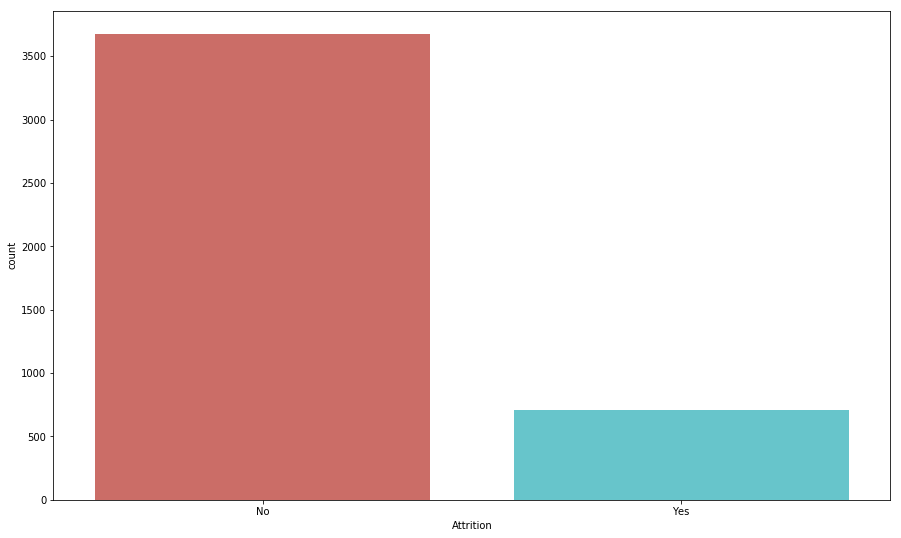

In [125]:
sns.countplot(x='Attrition', data=general_data, palette='hls')
plt.show()

In [126]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life_Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research_&_Development,10,1,Life_Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research_&_Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research_&_Development,2,5,Life_Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research_&_Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [127]:
general_data.groupby('Attrition').count()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,3677,3677,3677,3677,3677,3677,3677,3677,3677,3677,...,3677,3677,3677,3677,3677,3677,3677,3677,3677,3677
Yes,705,705,705,705,705,705,705,705,705,705,...,705,705,705,705,705,705,705,705,705,705


In [128]:
general_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [129]:
general_data.groupby('Attrition').median()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,
No,36,7,3,1,2216,2,49300,2.0,14,8,1,10.0,3,6,1,3
Yes,32,7,3,1,2165,2,49080,1.0,14,8,1,7.0,3,3,1,2


In [130]:
hr_data = pd.get_dummies(general_data, columns=['BusinessTravel','Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18'])

## Scaling the dataset

In [131]:
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
data_scaled = scaled_df(hr_data)

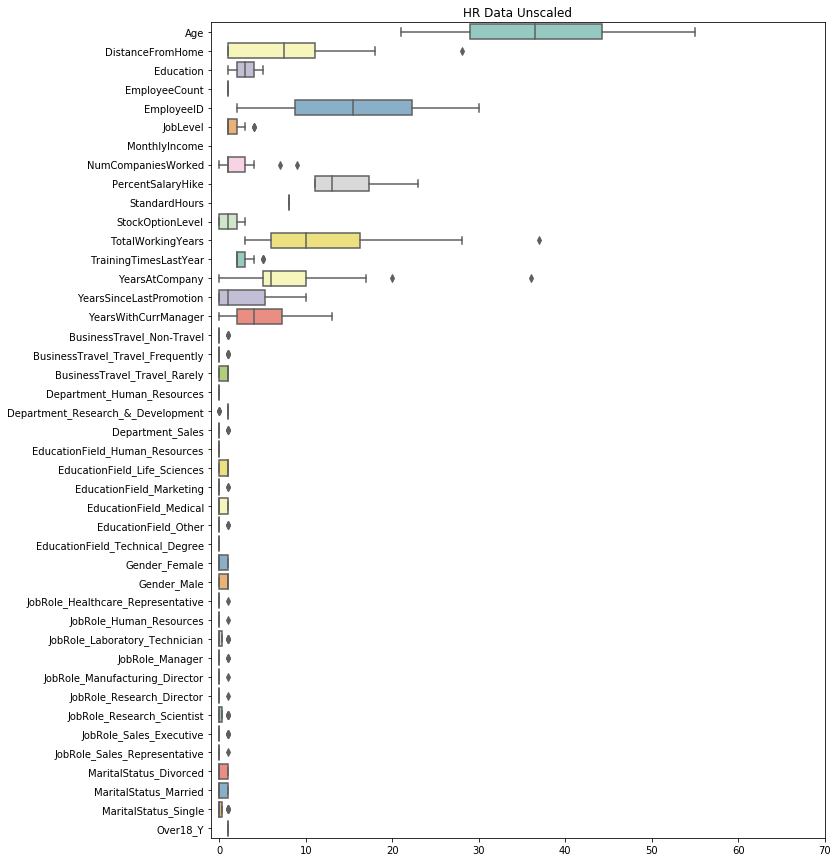

In [132]:
f, ax = plt.subplots(figsize=(11, 15))
plt.title("HR Data Unscaled")
ax.set(xlim=(-1, 70))
ax = sns.boxplot(data = hr_data[1:29], 
  orient = 'h', 
  palette = 'Set3')

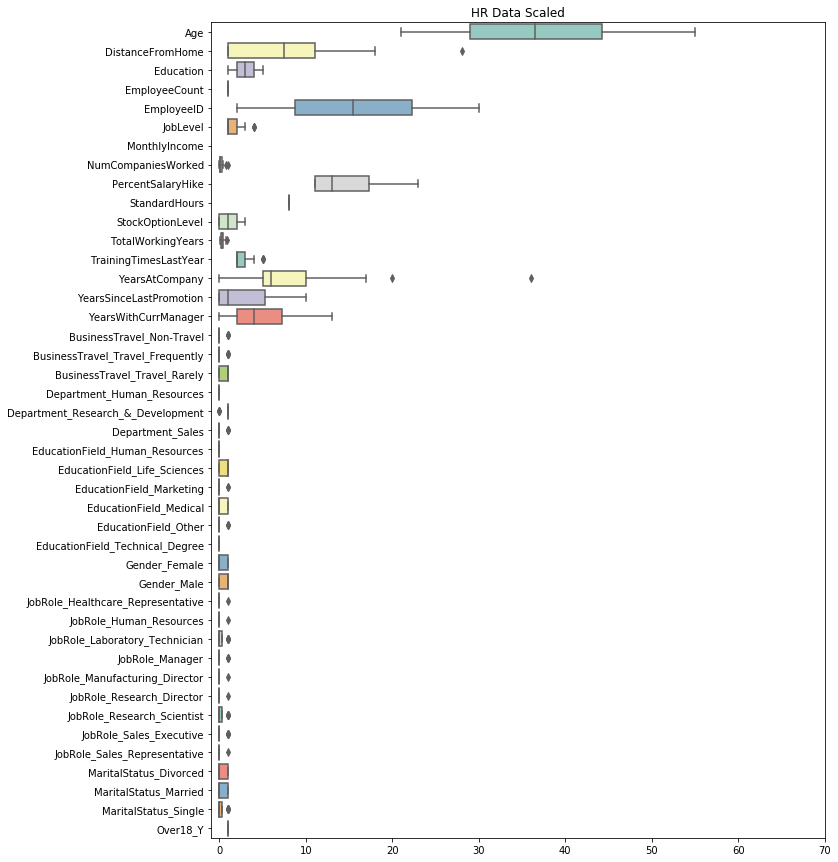

In [133]:
f, ax = plt.subplots(figsize=(11, 15))
plt.title("HR Data Scaled")
ax.set(xlim=(-1, 70))
ax = sns.boxplot(data = data_scaled[1:29], 
  orient = 'h', 
  palette = 'Set3')

In [226]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 44 columns):
Age                                  4382 non-null int64
Attrition                            4382 non-null object
DistanceFromHome                     4382 non-null int64
Education                            4382 non-null int64
EmployeeCount                        4382 non-null int64
EmployeeID                           4382 non-null int64
JobLevel                             4382 non-null int64
MonthlyIncome                        4382 non-null int64
NumCompaniesWorked                   4382 non-null float64
PercentSalaryHike                    4382 non-null int64
StandardHours                        4382 non-null int64
StockOptionLevel                     4382 non-null int64
TotalWorkingYears                    4382 non-null float64
TrainingTimesLastYear                4382 non-null int64
YearsAtCompany                       4382 non-null int64
YearsSinceLastPromotion          

In [227]:
field_names_df = pd.read_table('/Users/jo-ji/Downloads/general_d.txt',header=None)
field_names=field_names_df[0].tolist()
field_names

['Age',
 'Attrition',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeID',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human_Resources',
 'Department_Research_&_Development',
 'Department_Sales',
 'EducationField_Human_Resources',
 'EducationField_Life_Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical_Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare_Representative',
 'JobRole_Human_Resources',
 'JobRole_Laboratory_Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing_Director',
 'JobRole_Research_Director',
 'JobRole_Research_Scientist',
 'JobRole_Sales_Executive',
 'JobRole_Sales_Repres

In [228]:
field_names_df1=field_names_df.drop(1)
predictor_names=field_names_df1[0].tolist()
predictor_names

['Age',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeID',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human_Resources',
 'Department_Research_&_Development',
 'Department_Sales',
 'EducationField_Human_Resources',
 'EducationField_Life_Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical_Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare_Representative',
 'JobRole_Human_Resources',
 'JobRole_Laboratory_Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing_Director',
 'JobRole_Research_Director',
 'JobRole_Research_Scientist',
 'JobRole_Sales_Executive',
 'JobRole_Sales_Representative',
 'M

In [229]:
hr_data.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,51,No,6,2,1,1,1,131160,1.0,11,...,0,0,0,0,0,0,0,1,0,1
1,31,Yes,10,1,1,2,1,41890,0.0,23,...,0,0,0,1,0,0,0,0,1,1
2,32,No,17,4,1,3,4,193280,1.0,15,...,0,0,0,0,1,0,0,1,0,1
3,38,No,2,5,1,4,3,83210,3.0,11,...,0,0,0,0,0,0,0,1,0,1
4,32,No,10,1,1,5,1,23420,4.0,12,...,0,0,0,0,1,0,0,0,1,1


## Ranking the Features

In [230]:
def rank_predictors(dat1,l,f='Attrition'):
    rank={}
    max_vals=dat1.max()
    median_vals=dat1.groupby(f).median()  # We are using the median as the mean is sensitive to outliers
    for p in l:
        score=np.abs((median_vals[p]['No']-median_vals[p]['Yes'])/max_vals[p])
        rank[p]=score
    return rank
cat_rank=rank_predictors(hr_data,predictor_names) 
cat_rank

{'Age': 0.06666666666666667,
 'DistanceFromHome': 0.0,
 'Education': 0.0,
 'EmployeeCount': 0.0,
 'EmployeeID': 0.0115672488092538,
 'JobLevel': 0.0,
 'MonthlyIncome': 0.0011000550027501375,
 'NumCompaniesWorked': 0.1111111111111111,
 'PercentSalaryHike': 0.0,
 'StandardHours': 0.0,
 'StockOptionLevel': 0.0,
 'TotalWorkingYears': 0.075,
 'TrainingTimesLastYear': 0.0,
 'YearsAtCompany': 0.075,
 'YearsSinceLastPromotion': 0.0,
 'YearsWithCurrManager': 0.058823529411764705,
 'BusinessTravel_Non-Travel': 0.0,
 'BusinessTravel_Travel_Frequently': 0.0,
 'BusinessTravel_Travel_Rarely': 0.0,
 'Department_Human_Resources': 0.0,
 'Department_Research_&_Development': 0.0,
 'Department_Sales': 0.0,
 'EducationField_Human_Resources': 0.0,
 'EducationField_Life_Sciences': 0.0,
 'EducationField_Marketing': 0.0,
 'EducationField_Medical': 0.0,
 'EducationField_Other': 0.0,
 'EducationField_Technical_Degree': 0.0,
 'Gender_Female': 0.0,
 'Gender_Male': 0.0,
 'JobRole_Healthcare_Representative': 0.0,
 '

In [231]:
cat_rank=sorted(cat_rank.items(), key=lambda x: x[1])
cat_rank

[('DistanceFromHome', 0.0),
 ('Education', 0.0),
 ('EmployeeCount', 0.0),
 ('JobLevel', 0.0),
 ('PercentSalaryHike', 0.0),
 ('StandardHours', 0.0),
 ('StockOptionLevel', 0.0),
 ('TrainingTimesLastYear', 0.0),
 ('YearsSinceLastPromotion', 0.0),
 ('BusinessTravel_Non-Travel', 0.0),
 ('BusinessTravel_Travel_Frequently', 0.0),
 ('BusinessTravel_Travel_Rarely', 0.0),
 ('Department_Human_Resources', 0.0),
 ('Department_Research_&_Development', 0.0),
 ('Department_Sales', 0.0),
 ('EducationField_Human_Resources', 0.0),
 ('EducationField_Life_Sciences', 0.0),
 ('EducationField_Marketing', 0.0),
 ('EducationField_Medical', 0.0),
 ('EducationField_Other', 0.0),
 ('EducationField_Technical_Degree', 0.0),
 ('Gender_Female', 0.0),
 ('Gender_Male', 0.0),
 ('JobRole_Healthcare_Representative', 0.0),
 ('JobRole_Human_Resources', 0.0),
 ('JobRole_Laboratory_Technician', 0.0),
 ('JobRole_Manager', 0.0),
 ('JobRole_Manufacturing_Director', 0.0),
 ('JobRole_Research_Director', 0.0),
 ('JobRole_Research_Sc

In [232]:
# Take the top predictors based on median difference
ranked_predictors=[]
for f in cat_rank[30:]:
    ranked_predictors.append(f[0])
ranked_predictors

['JobRole_Sales_Executive',
 'JobRole_Sales_Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'Over18_Y',
 'MonthlyIncome',
 'EmployeeID',
 'YearsWithCurrManager',
 'Age',
 'TotalWorkingYears',
 'YearsAtCompany',
 'NumCompaniesWorked',
 'MaritalStatus_Single']

In [274]:
X= data_scaled[ranked_predictors]
y= data_scaled["Attrition"]
y.head()

0     No
1    Yes
2     No
3     No
4     No
Name: Attrition, dtype: object

In [275]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

## Decistion Tree Classifier

In [276]:
# Decision Tree classifier

DTm = DecisionTreeClassifier()
                                
# Decision Tree cross validation

print("KfoldCrossVal mean score using Decision Tree is %s" %cross_val_score(DTm,X,y,cv=10).mean())

# Decision Tree metrics
sm = DTm.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Decision Tree is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Decision Tree is 0.9806294849596024
Accuracy score using Decision Tree is 0.9406731317741015


## Random Forest Classifier

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [277]:
# Random Forest classifier

RFm = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 100,
                                max_features = 5)
                                
# Random Forest cross validation
print("KfoldCrossVal mean score using Random Forest is %s" %cross_val_score(RFm,X,y,cv=10).mean())

# Random Forest metrics
sm = RFm.fit(X_train, y_train)


y_pred = sm.predict(X_test)
print("Accuracy score using Random Forest is %s" %metrics.accuracy_score(y_test, y_pred))
pprint(sm.get_params())

KfoldCrossVal mean score using Random Forest is 0.9897312019100853
Accuracy score using Random Forest is 0.9235596120935539
{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 5,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## Hyperparameters

n_estimators = number of trees in the foreset;

max_features = max number of features considered for splitting a node;

max_depth = max number of levels in each decision tree;

min_samples_split = min number of data points placed in a node before the node is split;

min_samples_leaf = min number of data points allowed in a leaf node;

bootstrap = method for sampling data points (with or without replacement);

In [279]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [283]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30, 40, 50]}


# Random Search Training

It takes atmost 10 mins or more to run the program

In [284]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 2 fold cross validation, 
from sklearn.grid_search import GridSearchCV

In [285]:
CV_rfc = GridSearchCV(estimator=rf, n_jobs=-1, param_grid= random_grid, cv= 2,verbose=0)
cv = CV_rfc.fit(X_train, y_train)

Prints the best hyperparameters from the random search

In [286]:
pprint(CV_rfc.best_params_)

{'bootstrap': False,
 'max_depth': 36,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}


In [289]:
y_pred = cv.predict(X_test)
print("Accuracy score using Random Forest is %s" %metrics.accuracy_score(y_test, y_pred))
pprint(cv.best_params_)

Accuracy score using Random Forest is 0.9555048488305762
{'bootstrap': False,
 'max_depth': 36,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}


## Imoprtance of the features used in the model

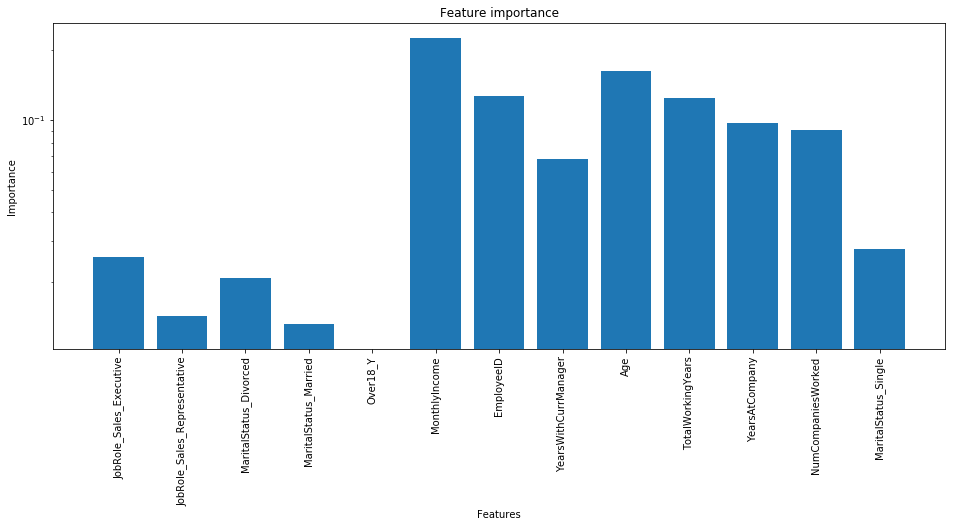

In [150]:
feature_importance = sm.feature_importances_
plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), ranked_predictors, rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

## Boosting in Classification

In [155]:
boost_model = XGBClassifier()
boost_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [156]:
y_pred = boost_model.predict(X_test)

In [157]:
print("Accuracy score using Boosting is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using Boosting is 0.8465487735310896


In [158]:
print("KfoldCrossVal mean score using Boosting is %s" %cross_val_score(boost_model,X,y,cv=10).mean())

KfoldCrossVal mean score using Boosting is 0.8676351348183138


# Logistic Regression

In [159]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 44 columns):
Age                                  4382 non-null int64
Attrition                            4382 non-null object
DistanceFromHome                     4382 non-null int64
Education                            4382 non-null int64
EmployeeCount                        4382 non-null int64
EmployeeID                           4382 non-null int64
JobLevel                             4382 non-null int64
MonthlyIncome                        4382 non-null int64
NumCompaniesWorked                   4382 non-null float64
PercentSalaryHike                    4382 non-null int64
StandardHours                        4382 non-null int64
StockOptionLevel                     4382 non-null int64
TotalWorkingYears                    4382 non-null float64
TrainingTimesLastYear                4382 non-null int64
YearsAtCompany                       4382 non-null int64
YearsSinceLastPromotion          

In [160]:
hr_logit_data = pd.get_dummies(hr_data, columns=['Attrition'], drop_first=True)

In [161]:
hr_logit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 44 columns):
Age                                  4382 non-null int64
DistanceFromHome                     4382 non-null int64
Education                            4382 non-null int64
EmployeeCount                        4382 non-null int64
EmployeeID                           4382 non-null int64
JobLevel                             4382 non-null int64
MonthlyIncome                        4382 non-null int64
NumCompaniesWorked                   4382 non-null float64
PercentSalaryHike                    4382 non-null int64
StandardHours                        4382 non-null int64
StockOptionLevel                     4382 non-null int64
TotalWorkingYears                    4382 non-null float64
TrainingTimesLastYear                4382 non-null int64
YearsAtCompany                       4382 non-null int64
YearsSinceLastPromotion              4382 non-null int64
YearsWithCurrManager              

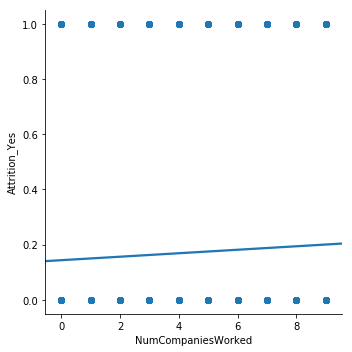

In [162]:
sns.lmplot(x='NumCompaniesWorked', y='Attrition_Yes', data=hr_logit_data, ci=None)

In [163]:
hr_logit_data.std()

Age                                      9.137272
DistanceFromHome                         8.105396
Education                                1.024728
EmployeeCount                            0.000000
EmployeeID                            1271.688783
JobLevel                                 1.106115
MonthlyIncome                        47142.310175
NumCompaniesWorked                       2.497832
PercentSalaryHike                        3.663007
StandardHours                            0.000000
StockOptionLevel                         0.852397
TotalWorkingYears                        7.785717
TrainingTimesLastYear                    1.289402
YearsAtCompany                           6.129351
YearsSinceLastPromotion                  3.224994
YearsWithCurrManager                     3.569674
BusinessTravel_Non-Travel                0.302994
BusinessTravel_Travel_Frequently         0.390972
BusinessTravel_Travel_Rarely             0.454048
Department_Human_Resources               0.202145


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1e047748>,
      dtype=object)

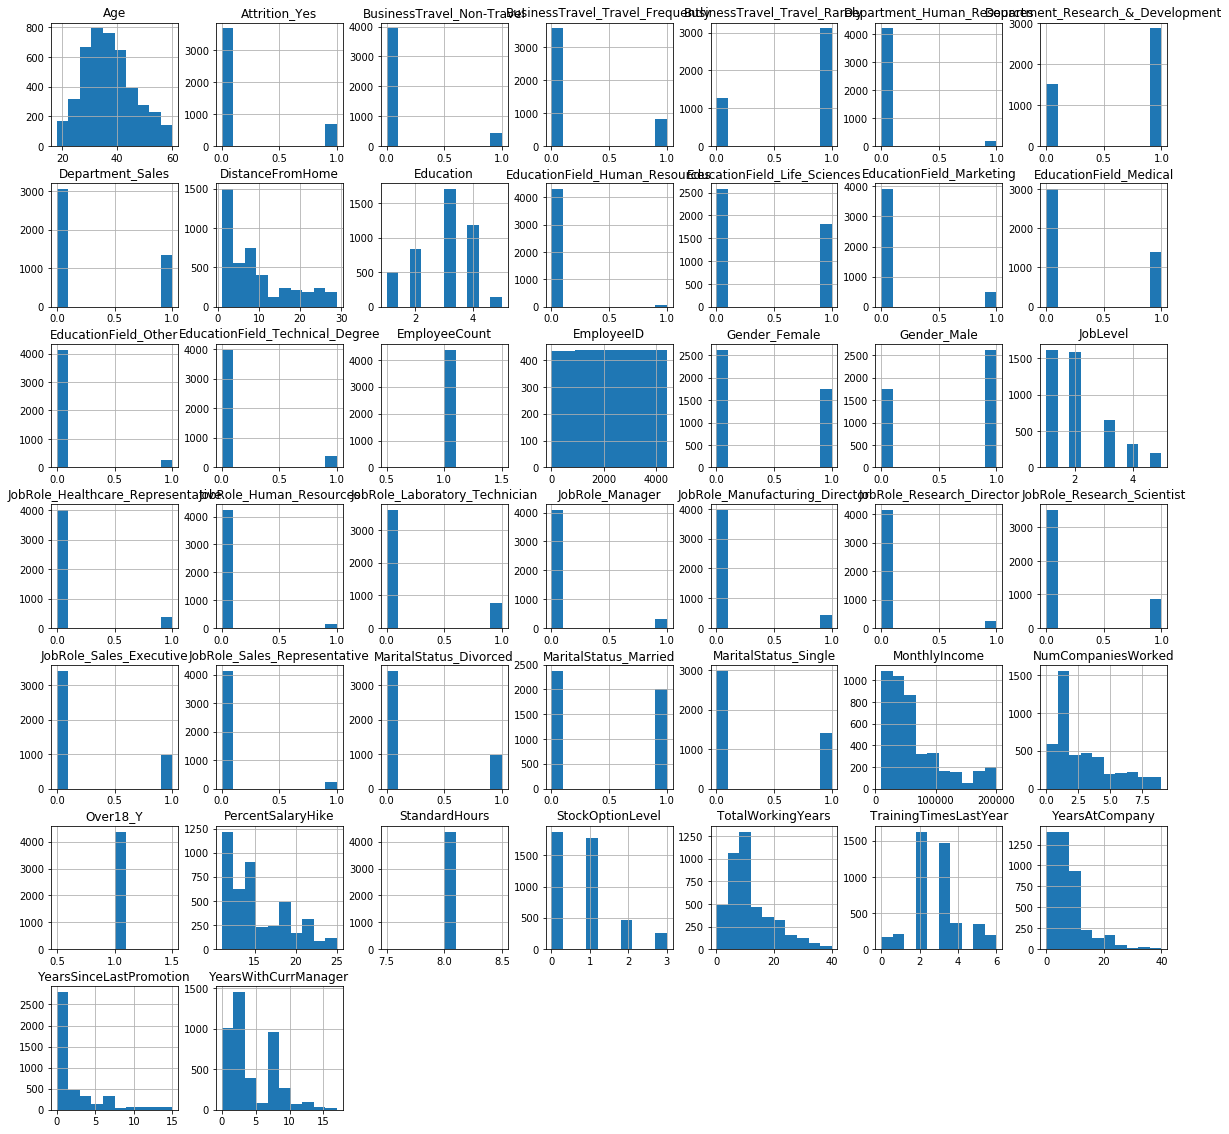

In [164]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
hr_logit_data.hist(ax=ax)

In [165]:
pd.crosstab(hr_logit_data['Attrition_Yes'], hr_logit_data['NumCompaniesWorked'], rownames=['Attrition'])

NumCompaniesWorked,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Attrition,,,,,,,,,,
0,515,1264,390,426,364,141,160,168,129,120
1,69,292,48,48,49,46,48,51,18,36


In [166]:
hr_logit_data['intercept'] = 1.0
hr_logit_data.head()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,Attrition_Yes,intercept
0,51,6,2,1,1,1,131160,1.0,11,8,...,0,0,0,0,0,1,0,1,0,1.0
1,31,10,1,1,2,1,41890,0.0,23,8,...,0,1,0,0,0,0,1,1,1,1.0
2,32,17,4,1,3,4,193280,1.0,15,8,...,0,0,1,0,0,1,0,1,0,1.0
3,38,2,5,1,4,3,83210,3.0,11,8,...,0,0,0,0,0,1,0,1,0,1.0
4,32,10,1,1,5,1,23420,4.0,12,8,...,0,0,1,0,0,0,1,1,0,1.0


## Multicollinearity

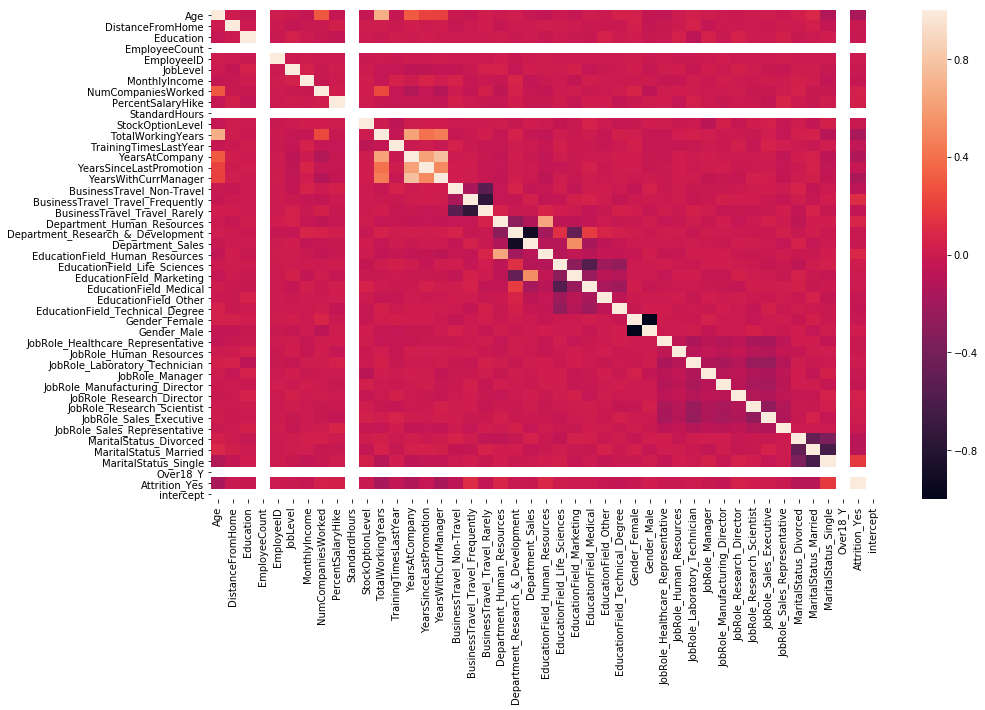

In [167]:
sns.heatmap(hr_logit_data.corr())

In [168]:
pred=pred_data.columns[:]
pred

Index(['TotalWorkingYears'], dtype='object')

In [223]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [233]:
y_pred = classifier.predict(X_test)

In [234]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.05


In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         No       0.82      1.00      0.90      1446
        Yes       0.00      0.00      0.00       307

avg / total       0.68      0.82      0.75      1753



In [173]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [174]:
#Imports
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [175]:
vif.round(1)

,VIF Factor,features
0,1.000000,JobRole_Sales_Executive
1,1.000000,JobRole_Sales_Representative
2,inf,MaritalStatus_Divorced
3,inf,MaritalStatus_Married
4,0.000000,Over18_Y
5,1.000000,MonthlyIncome
6,1.000000,EmployeeID
7,2.500000,YearsWithCurrManager
8,2.000000,Age
9,3.100000,TotalWorkingYears


# Random Forest Regression Model

In [176]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Hyperparameters
n_estimators = number of trees in the foreset;

max_features = max number of features considered for splitting a node;

max_depth = max number of levels in each decision tree;

min_samples_split = min number of data points placed in a node before the node is split;

min_samples_leaf = min number of data points allowed in a leaf node;

bootstrap = method for sampling data points (with or without replacement);

In [177]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [178]:
field_names_df = pd.read_table('/Users/jo-ji/Downloads/general_d_reg.txt',header=None)
field_names_df

,0
0,Age
1,Attrition_No
2,Attrition_Yes
3,DistanceFromHome
4,Education
5,EmployeeCount
6,EmployeeID
7,JobLevel
8,MonthlyIncome
9,NumCompaniesWorked


In [179]:
hr_data_reg = pd.get_dummies(general_data, columns=['Attrition','BusinessTravel','Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18'])

In [180]:
hr_data_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 45 columns):
Age                                  4382 non-null int64
DistanceFromHome                     4382 non-null int64
Education                            4382 non-null int64
EmployeeCount                        4382 non-null int64
EmployeeID                           4382 non-null int64
JobLevel                             4382 non-null int64
MonthlyIncome                        4382 non-null int64
NumCompaniesWorked                   4382 non-null float64
PercentSalaryHike                    4382 non-null int64
StandardHours                        4382 non-null int64
StockOptionLevel                     4382 non-null int64
TotalWorkingYears                    4382 non-null float64
TrainingTimesLastYear                4382 non-null int64
YearsAtCompany                       4382 non-null int64
YearsSinceLastPromotion              4382 non-null int64
YearsWithCurrManager              

In [181]:
field_names_df1=field_names_df.drop(8)
predictor_names=field_names_df1[0].tolist()
predictor_names

['Age',
 'Attrition_No',
 'Attrition_Yes',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeID',
 'JobLevel',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human_Resources',
 'Department_Research_&_Development',
 'Department_Sales',
 'EducationField_Human_Resources',
 'EducationField_Life_Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical_Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare_Representative',
 'JobRole_Human_Resources',
 'JobRole_Laboratory_Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing_Director',
 'JobRole_Research_Director',
 'JobRole_Research_Scientist',
 'JobRole_Sales_Executive',
 'JobRole_Sales_Rep

In [204]:
ranked_predictors.remove('MonthlyIncome')

In [210]:
ranked_predictors.remove('EmployeeID')

In [206]:
X= hr_data_reg[ranked_predictors]
y= hr_data_reg["MonthlyIncome"]
y.head()

0    131160
1     41890
2    193280
3     83210
4     23420
Name: MonthlyIncome, dtype: int64

In [211]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

## Random Search For Regression

Depending upon the parameters but this also takes 10 - 15 mins to run

In [244]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 40, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   1.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=

[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total=   5.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=   6.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=   6.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=   6.3s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=   5.7s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1000,

[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total=  18.7s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total=  18.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True, total=  25.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True, total=  26.2s
[CV]  n_estimators=1000,

[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=   9.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True, total=   2.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=  37.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=  33.7s
[CV] n_estimators=800, min_s

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  6.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [245]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [246]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [248]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_test, y_test)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 13613.7427 degrees.
Accuracy = 70.38%.


In [247]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 24059.1996 degrees.
Accuracy = 49.85%.


## Boosting for Regression

In [191]:
import xgboost

In [192]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [214]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [216]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

-3.5429400094401595


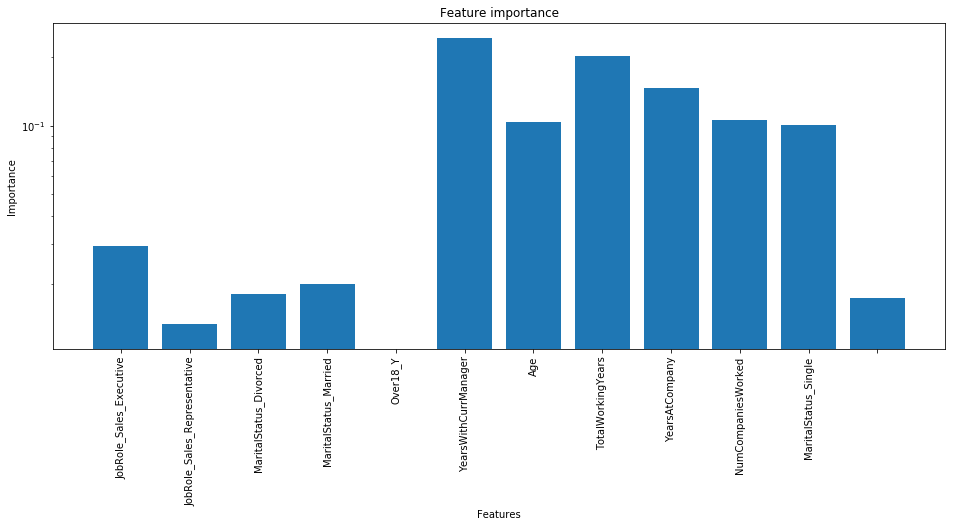

In [217]:
feature_importance = base_model.feature_importances_
plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), ranked_predictors, rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

## Linear Regression

In [196]:
hr_data_reg.head()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,51,6,2,1,1,1,131160,1.0,11,8,...,0,0,0,0,0,0,0,1,0,1
1,31,10,1,1,2,1,41890,0.0,23,8,...,0,0,0,1,0,0,0,0,1,1
2,32,17,4,1,3,4,193280,1.0,15,8,...,0,0,0,0,1,0,0,1,0,1
3,38,2,5,1,4,3,83210,3.0,11,8,...,0,0,0,0,0,0,0,1,0,1
4,32,10,1,1,5,1,23420,4.0,12,8,...,0,0,0,0,1,0,0,0,1,1


In [1]:
### Multicollinearity

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c20f4a828>,
      dtype=object)

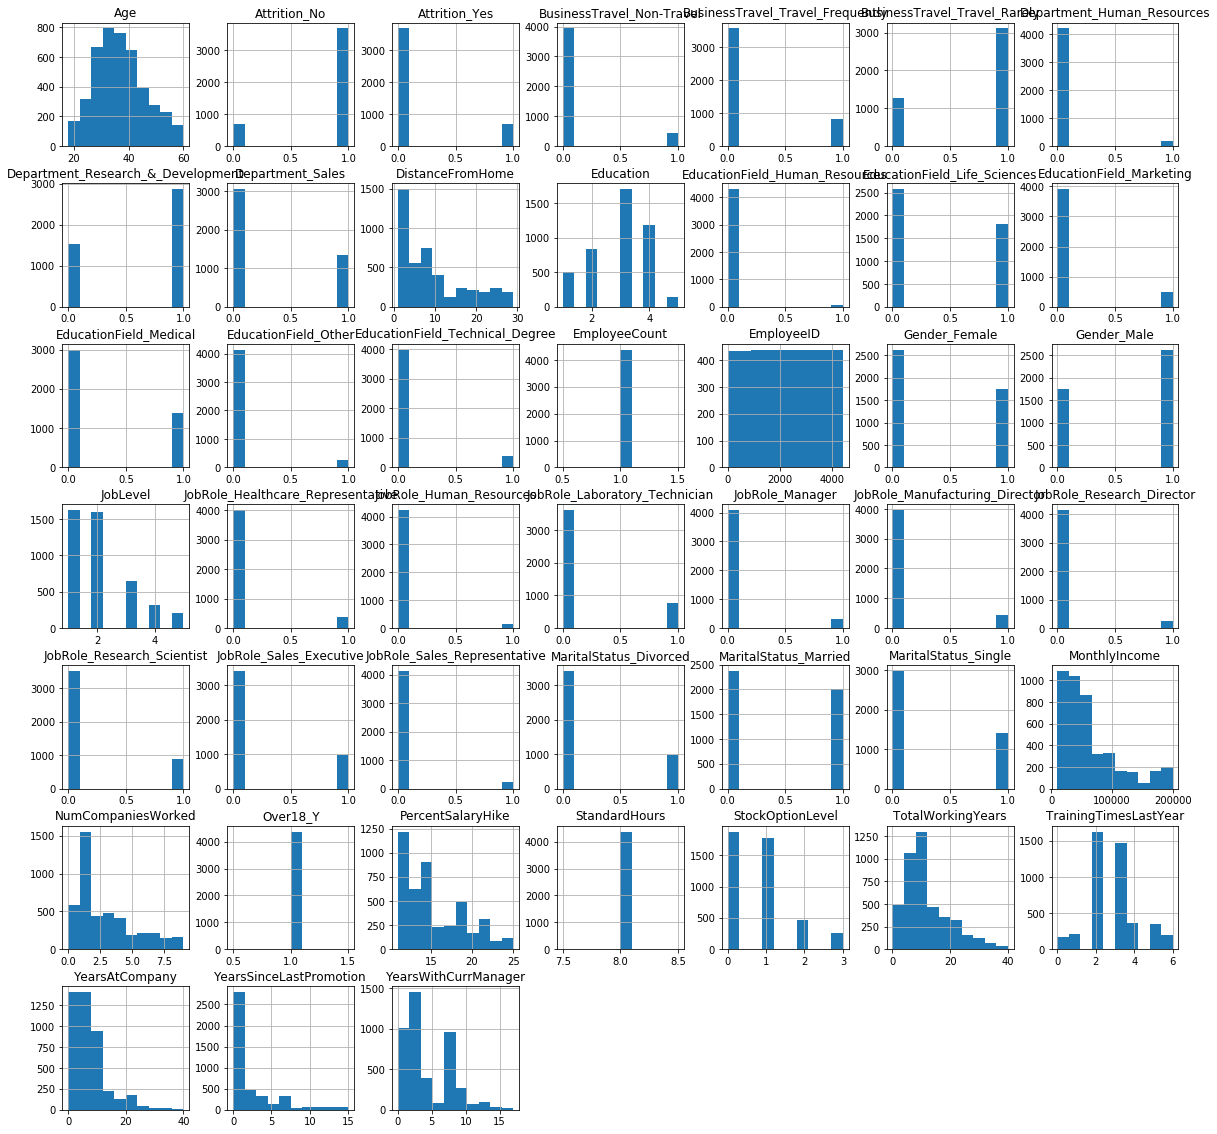

In [198]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
hr_data_reg.hist(ax=ax)

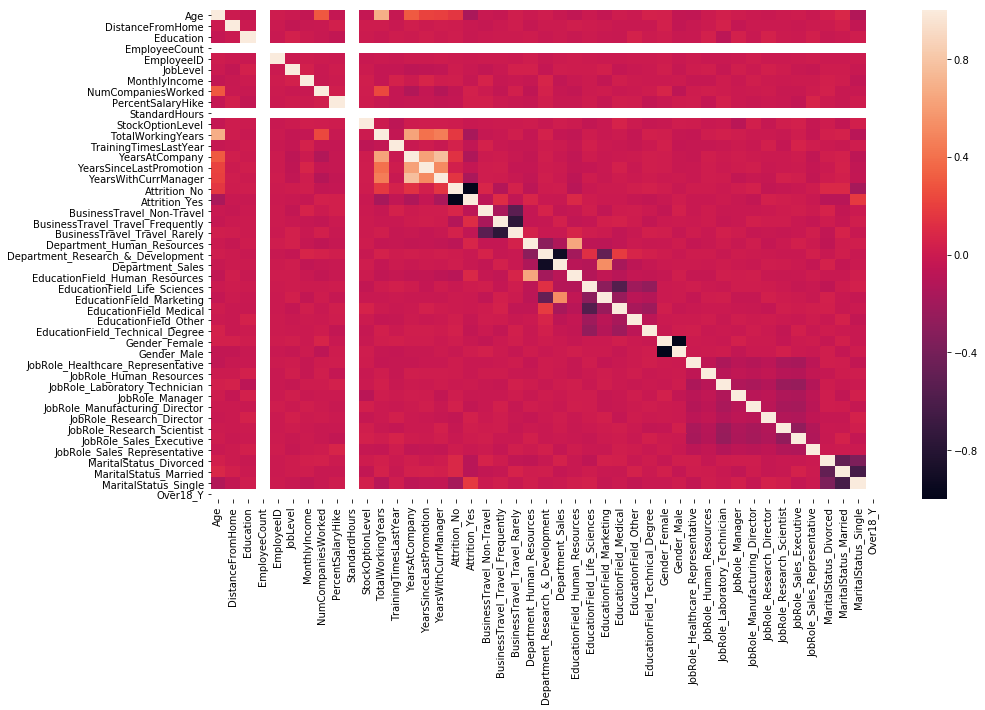

In [199]:
sns.heatmap(hr_data_reg.corr())

In [218]:
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)

# Print the coefficients
print (results.intercept_, results.coef_)

72651.03327757143 [-3.75491513e+01  1.08480005e+03  3.88203734e+03  1.11572836e+02
 -6.02540240e-12  3.58187210e-01  7.98534940e+02 -2.30885579e+02
 -9.15498530e+01 -2.96112698e+02 -2.85780159e+01 -3.99361018e+03]


In [236]:
y_pred = model.predict(X_test)

array([67171.84019633, 63412.07437304, 71183.97418338, ...,
       70455.78410905, 67812.66219855, 64066.52832421])

In [220]:
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.00


## Citation

https://towardsdatascience.com/boosting-in-machine-learning-and-the-implementation-of-xgboost-in-python-fb5365e9f2a0

https://github.com/nikbearbrown/INFO_7390/blob/master/Week_5/NBB_Decision_Trees_Random_Forest.ipynb

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://medium.com/machine-learning-101/chapter-5-random-forest-classifier-56dc7425c3e1

https://datawhatnow.com/feature-importance/

https://datascienceplus.com/building-a-logistic-regression-in-python-step-by-step/